# Coupon Redemption

### Introduction

ABC Grocery is an established brick and mortar retailer that frequently conducts marketing campaigns for its diverse product range. ABC believes that an increase in coupon redemption will increase overall revenue. Customer demographic data collected from loyalty card applications and internal data on transactions and coupon use will be analyzed to determine which coupons ABC should promote and to which customers ABC should send coupons to increase coupon redemption by 10% in the next year.

Data from retailer was available in six tables (train, customer demographics, campaign data, coupon item mapping, item data and customer transaction data) on Kaggle. Kaggle user, vasudeva, merged data into one dataset. This code was borrowed to create the dataset that will be analyzed for this project. See "https://libbyinc-my.sharepoint.com/:u:/g/personal/libbybrown_libbyinc_onmicrosoft_com/ERmb7wIG5thItSVhy01k6LIBj6TQ51yTFNcwTPlh1TYHTg?e=2d2Zhk"

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
dataset = pd.read_csv("dataset.csv")

In [4]:
dataset.shape

(78369, 46)

In [5]:
dataset.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'brand', 'brand_type', 'category', 'cd_sum', 'coupon_discount_x',
       'coupon_used_x', 'item_counts', 'no_of_customers', 'od_sum',
       'other_discount_x', 'price_sum', 'qu_sum', 'quantity_x',
       'selling_price_x', 't_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'start_date', 'end_date',
       'campaign_duration', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'coupon_discount_y',
       'coupon_used_y', 'day', 'dow', 'no_of_items', 'month',
       'other_discount_y', 'quantity_y', 'selling_price_y', 'cdd_sum',
       'customer_id_count', 'odd_sum', 'qa_sum', 'pprice_sum'],
      dtype='object')

In [6]:
dataset.sort_values("id").head(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,brand,brand_type,category,cd_sum,coupon_discount_x,...,no_of_items,month,other_discount_y,quantity_y,selling_price_y,cdd_sum,customer_id_count,odd_sum,qa_sum,pprice_sum
0,1,13,27,1053,0,1105,Established,Grocery,-5349.93,-1.241694,...,208,5,-25.583099,340.487097,163.966826,-89.05,310,-7930.760842,105551,50829.715972
1,2,13,116,48,0,56,Local,Grocery,0.00,0.000000,...,244,6,-20.013685,31.540260,188.638474,-1237.79,385,-7705.268702,12143,72625.812434
2,6,9,635,205,0,560,Established,Pharmaceutical,-605.54,-2.987321,...,533,3,-12.873370,1.392784,112.067666,-2145.72,970,-12487.169143,1351,108705.636349
3,7,13,644,1050,0,611,Established,Grocery,-17.81,-4.452500,...,216,8,-12.880868,1.291139,100.896997,-178.10,237,-3052.765833,306,23912.588333
4,9,8,1017,1489,0,1558,Established,Grocery,-569.92,-0.198055,...,327,5,-12.264174,247.443060,85.016352,-265.01,562,-6892.466021,139063,47779.189609
5,11,11,795,793,0,948,Established,Pharmaceutical,0.00,0.000000,...,869,11,-12.796770,93.200000,117.668640,-989.87,1720,-22010.443947,160304,202390.060583
6,14,9,444,590,0,133,Established,Grocery,-569.92,-1.155299,...,552,5,-11.795406,463.424455,90.986568,-162.07,1284,-15145.301464,595037,116826.753492
7,15,29,538,368,0,278,Established,Grocery,-64.11,-1.173727,...,1199,5,-10.170159,78.288082,95.310249,-103.30,2534,-25771.181733,198382,241516.171322
8,17,30,857,523,0,507,Established,Grocery,-277.84,-0.205911,...,127,2,-10.792414,1.802469,90.590789,-388.24,243,-2622.556636,438,22013.561788
9,19,2,559,679,0,350,Established,Packaged Meat,-2496.92,-1.132692,...,469,2,-12.489503,1.253655,112.112890,0.00,1368,-17085.640167,1715,153370.434083


### Data Cleansing

In [7]:
#Rename columns
dataset2 = dataset.rename(columns={'brand' : 'brand_id',
    'campaign_duration' : 'campaign_days', 
    'coupon_discount_x': 'coupon_discount_mean_coupon',
    'coupon_discount_y': 'coupon_discount_mean_customer',
    'cdd_sum': 'coupon_discount_sum_customer',
    'cd_sum': 'coupon_discount_sum_item',
    't_counts': 'customer_count_item',
    'price_sum': 'customer_spend_sum',
    'no_of_customers': 'customers_that_redeemed_mean',
    'item_counts': 'item_id',
    'coupon_used_x': 'no_coupons_redeemed',
    'coupon_used_y': 'no_customers_redeemed', 
    'no_of_items': 'no_of_items_customer',
    'other_discount_x': 'other_discount_coupon_mean',
    'other_discount_y': 'other_discount_customer_mean',
    'odd_sum': 'other_discount_customer_sum',
    'od_sum': 'other_discount_sum',
    'selling_price_x': 'price_coupon_mean',
    'quantity_x': 'quantity_coupon_mean',
    'quantity_y': 'quantity_customer_mean',
    'qa_sum': 'quantity_customer_sum',
    'qu_sum': 'quantity_purchased',
    'selling_price_y': 'selling_price_customer_mean',
    'pprice_sum': 'total_price_sum'})

In [8]:
dataset2.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'brand_id', 'brand_type', 'category', 'coupon_discount_sum_item',
       'coupon_discount_mean_coupon', 'no_coupons_redeemed', 'item_id',
       'customers_that_redeemed_mean', 'other_discount_sum',
       'other_discount_coupon_mean', 'customer_spend_sum',
       'quantity_purchased', 'quantity_coupon_mean', 'price_coupon_mean',
       'customer_count_item', 'total_discount_mean', 'total_discount_sum',
       'campaign_type', 'start_date', 'end_date', 'campaign_days', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'coupon_discount_mean_customer',
       'no_customers_redeemed', 'day', 'dow', 'no_of_items_customer', 'month',
       'other_discount_customer_mean', 'quantity_customer_mean',
       'selling_price_customer_mean', 'coupon_discount_sum_customer',
       'customer_id_count', 'other_discount_customer_sum',
       'quantity_customer_sum'

In [9]:
#Replace NaNs with "Blank"
dataset3 = dataset2.fillna('blank')

In [10]:
#Check for NaNs
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             78369 non-null  int64  
 1   campaign_id                    78369 non-null  int64  
 2   coupon_id                      78369 non-null  int64  
 3   customer_id                    78369 non-null  int64  
 4   redemption_status              78369 non-null  int64  
 5   brand_id                       78369 non-null  int64  
 6   brand_type                     78369 non-null  object 
 7   category                       78369 non-null  object 
 8   coupon_discount_sum_item       78369 non-null  float64
 9   coupon_discount_mean_coupon    78369 non-null  float64
 10  no_coupons_redeemed            78369 non-null  float64
 11  item_id                        78369 non-null  int64  
 12  customers_that_redeemed_mean   78369 non-null 

In [11]:
#Create a new column for Income Group
dataset3.loc[dataset3.income_bracket==1, 'income_group'] = "Low"
dataset3.loc[dataset3.income_bracket==2, 'income_group'] = "Low"
dataset3.loc[dataset3.income_bracket==3, 'income_group'] = "Low"
dataset3.loc[dataset3.income_bracket==4, 'income_group'] = "Low"
dataset3.loc[dataset3.income_bracket==5, 'income_group'] = "Middle"
dataset3.loc[dataset3.income_bracket==6, 'income_group'] = "Middle"
dataset3.loc[dataset3.income_bracket==7, 'income_group'] = "Middle"
dataset3.loc[dataset3.income_bracket==8, 'income_group'] = "Middle"
dataset3.loc[dataset3.income_bracket==9, 'income_group'] = "Middle"
dataset3.loc[dataset3.income_bracket==10, 'income_group'] = "Middle"
dataset3.loc[dataset3.income_bracket==11, 'income_group'] = "High"
dataset3.loc[dataset3.income_bracket==12, 'income_group'] = "High"

In [12]:
#Create a new column for Age Group
dataset3.loc[dataset3.age_range=='18-25', 'age_group'] = "Young Adults"
dataset3.loc[dataset3.age_range=='26-35', 'age_group'] = "Young Adults"
dataset3.loc[dataset3.age_range=='36-45', 'age_group'] = "Adults"
dataset3.loc[dataset3.age_range=='46-55', 'age_group'] = "Adults"
dataset3.loc[dataset3.age_range=='56-70', 'age_group'] = "Seniors"
dataset3.loc[dataset3.age_range=='70+', 'age_group'] = "Seniors"

In [13]:
#Create a new column for Product Group
dataset3.loc[dataset3.category=='Bakery', 'product_group'] = "Speciality"
dataset3.loc[dataset3.category=='Flowers & Plants', 'product_group'] = "Speciality"
dataset3.loc[dataset3.category=='Skin & Hair Care', 'product_group'] = "Speciality"
dataset3.loc[dataset3.category=='Dairy, Juices & Snacks', 'product_group'] = "Food"
dataset3.loc[dataset3.category=='Grocery', 'product_group'] = "Food"
dataset3.loc[dataset3.category=='Meat', 'product_group'] = "Food"
dataset3.loc[dataset3.category=='Packaged Meat', 'product_group'] = "Food"
dataset3.loc[dataset3.category=='Prepared Food', 'product_group'] = "Food"
dataset3.loc[dataset3.category=='Seafood', 'product_group'] = "Food"
dataset3.loc[dataset3.category=='Natural Products', 'product_group'] = "Natural"
dataset3.loc[dataset3.category=='Pharmaceutical', 'product_group'] = "Pharmaceutical"

In [14]:
dataset3.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,brand_id,brand_type,category,coupon_discount_sum_item,coupon_discount_mean_coupon,...,quantity_customer_mean,selling_price_customer_mean,coupon_discount_sum_customer,customer_id_count,other_discount_customer_sum,quantity_customer_sum,total_price_sum,income_group,age_group,product_group
0,1,13,27,1053,0,1105,Established,Grocery,-5349.93,-1.241694,...,340.487097,163.966826,-89.05,310,-7930.760842,105551,50829.715972,Middle,Adults,Food
1,2,13,116,48,0,56,Local,Grocery,0.00,0.000000,...,31.540260,188.638474,-1237.79,385,-7705.268702,12143,72625.812434,Low,Adults,Food
2,6,9,635,205,0,560,Established,Pharmaceutical,-605.54,-2.987321,...,1.392784,112.067666,-2145.72,970,-12487.169143,1351,108705.636349,Middle,Adults,Pharmaceutical
3,7,13,644,1050,0,611,Established,Grocery,-17.81,-4.452500,...,1.291139,100.896997,-178.10,237,-3052.765833,306,23912.588333,NaN,NaN,Food
4,9,8,1017,1489,0,1558,Established,Grocery,-569.92,-0.198055,...,247.443060,85.016352,-265.01,562,-6892.466021,139063,47779.189609,Low,Adults,Food


In [15]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             78369 non-null  int64  
 1   campaign_id                    78369 non-null  int64  
 2   coupon_id                      78369 non-null  int64  
 3   customer_id                    78369 non-null  int64  
 4   redemption_status              78369 non-null  int64  
 5   brand_id                       78369 non-null  int64  
 6   brand_type                     78369 non-null  object 
 7   category                       78369 non-null  object 
 8   coupon_discount_sum_item       78369 non-null  float64
 9   coupon_discount_mean_coupon    78369 non-null  float64
 10  no_coupons_redeemed            78369 non-null  float64
 11  item_id                        78369 non-null  int64  
 12  customers_that_redeemed_mean   78369 non-null 

In [16]:
dataset3.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'brand_id', 'brand_type', 'category', 'coupon_discount_sum_item',
       'coupon_discount_mean_coupon', 'no_coupons_redeemed', 'item_id',
       'customers_that_redeemed_mean', 'other_discount_sum',
       'other_discount_coupon_mean', 'customer_spend_sum',
       'quantity_purchased', 'quantity_coupon_mean', 'price_coupon_mean',
       'customer_count_item', 'total_discount_mean', 'total_discount_sum',
       'campaign_type', 'start_date', 'end_date', 'campaign_days', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'coupon_discount_mean_customer',
       'no_customers_redeemed', 'day', 'dow', 'no_of_items_customer', 'month',
       'other_discount_customer_mean', 'quantity_customer_mean',
       'selling_price_customer_mean', 'coupon_discount_sum_customer',
       'customer_id_count', 'other_discount_customer_sum',
       'quantity_customer_sum'

### Explore dataset via Issue Tree

In [17]:
#Overall Redemption Rate
round(dataset3['redemption_status'].value_counts(normalize=True), 2)

0    0.99
1    0.01
Name: redemption_status, dtype: float64

In [18]:
#Redemption Rate for Brand Type
brand_type = round(dataset3.groupby('brand_type')['redemption_status'].mean()*100, 1)
print(brand_type)

brand_type
Established    1.2
Local          0.1
Name: redemption_status, dtype: float64


In [19]:
#Filter for Established Brand
established = dataset3[dataset3.brand_type == 'Established']

Text(0, 0.5, 'Redemption Rate')

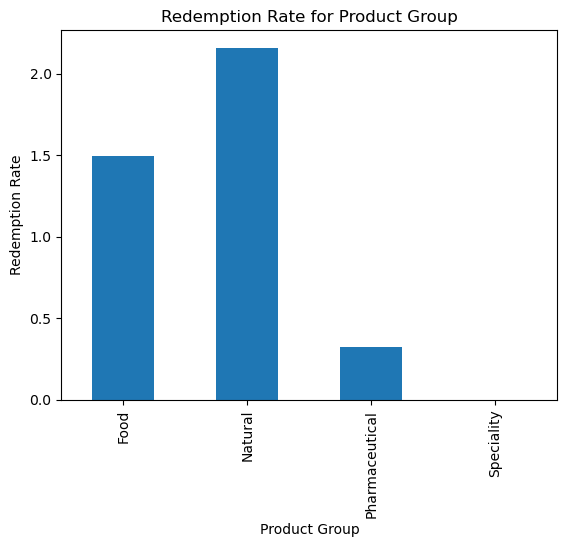

In [20]:
#Redemption Rate for Product Group from Established Brands
established_product = established.groupby('product_group')['redemption_status'].mean()*100
established_product.plot(kind="bar", title="Redemption Rate for Product Group")
plt.xlabel("Product Group")
plt.ylabel("Redemption Rate")

In [21]:
#Filter Established Brands for Food Products
food_products = established[established.product_group == 'Food']

Text(0, 0.5, 'Redemption Rate')

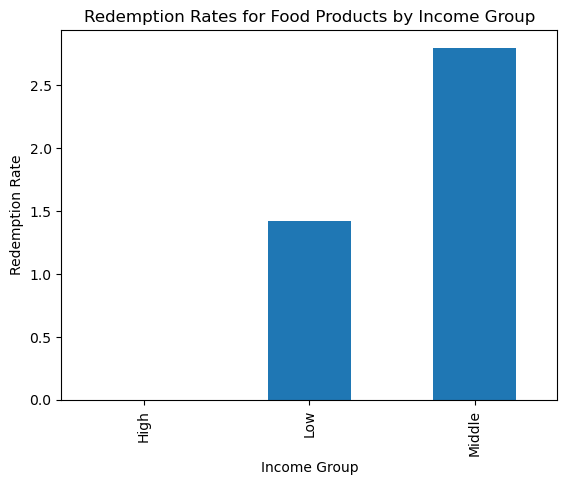

In [22]:
#Redemption Rates for Food Products and Income Group
food_products_income = round(food_products.groupby('income_group')['redemption_status'].mean()*100, 2)
food_products_income.plot(kind="bar", title="Redemption Rates for Food Products by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Redemption Rate")

In [23]:
#Filter Food Products for Low Income
food_low = food_products[food_products.income_group == 'Low']

Text(0, 0.5, 'Redemption Rate')

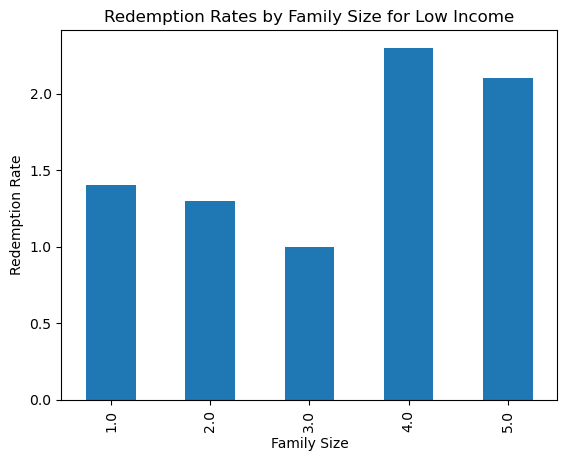

In [24]:
#Redemption Rates for Family Size
food_low_family = round(food_low.groupby('family_size')['redemption_status'].mean()*100, 1)
food_low_family.plot(kind="bar", title="Redemption Rates by Family Size for Low Income")
plt.xlabel("Family Size")
plt.ylabel("Redemption Rate")

Text(0.5, 58.7222222222222, 'Family Size')

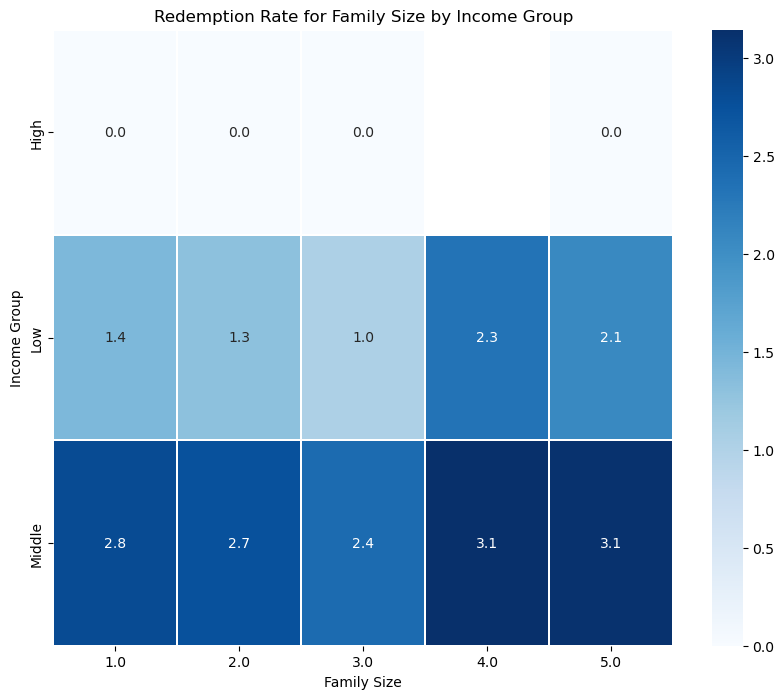

In [25]:
#Heatmap showing Redemption Rates by Family Size by Income Group
fig, ax = plt.subplots(figsize=(10, 8))
a = pd.crosstab(food_products['income_group'], food_products['family_size'], food_products['redemption_status'], aggfunc='mean')*100
sns.heatmap(a, annot=True, ax=ax, linewidths=.1, fmt='.1f', cmap="Blues")
plt.title("Redemption Rate for Family Size by Income Group")
plt.ylabel("Income Group")
plt.xlabel("Family Size")

In [26]:
#Filter Food Products for Middle Income
food_middle = food_products[food_products.income_group == 'Middle']

Text(0, 0.5, 'Redemption Rate')

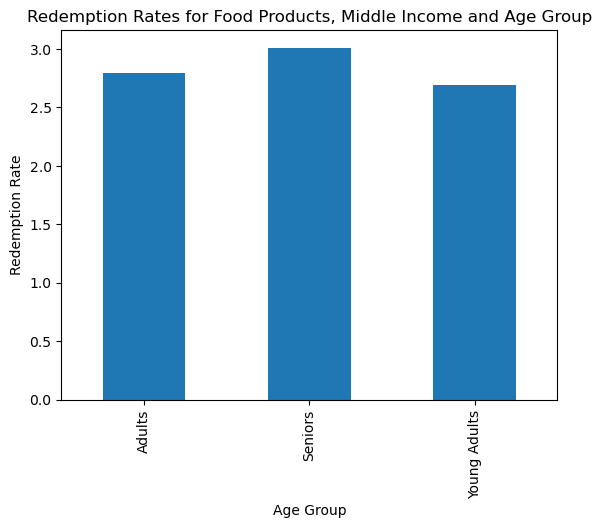

In [27]:
#Remption Rates by Age Group for Food Products and Middle Income
food_middle_age = round(food_middle.groupby('age_group')['redemption_status'].mean()*100, 2)
food_middle_age.plot(kind="bar", title="Redemption Rates for Food Products, Middle Income and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Redemption Rate")

Text(0.5, 58.7222222222222, 'Age Group')

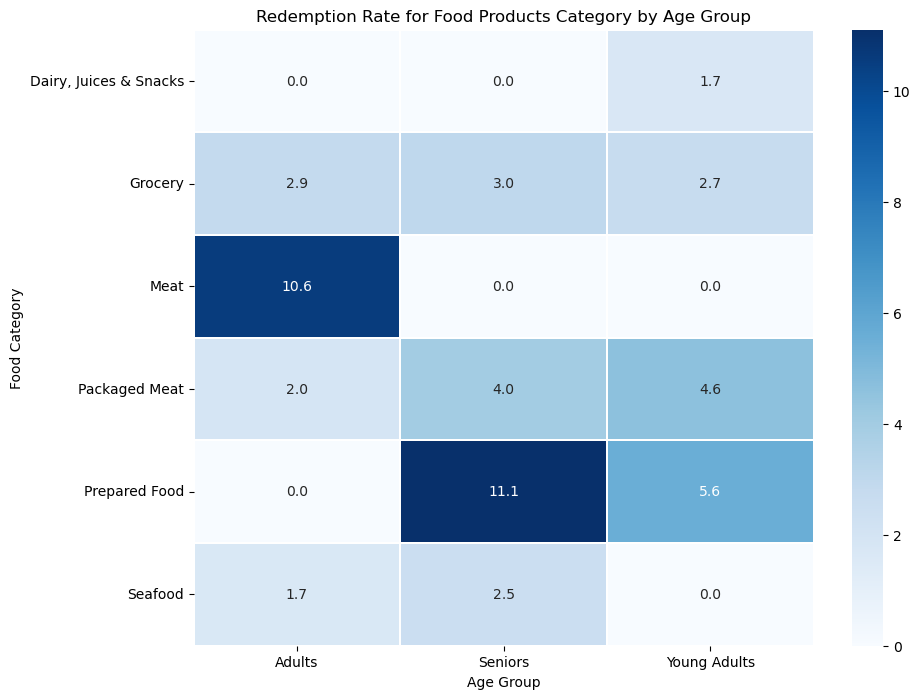

In [28]:
#Heat Map for Product Category by Age Group
fig, ax = plt.subplots(figsize=(10, 8))
b = pd.crosstab(food_middle['category'], food_middle['age_group'], food_middle['redemption_status'], aggfunc='mean')*100
sns.heatmap(b, annot=True, ax=ax, linewidths=.1, fmt='.1f', cmap="Blues")
plt.title("Redemption Rate for Food Products Category by Age Group")
plt.ylabel("Food Category")
plt.xlabel("Age Group")

#### Analyze Purchase HIstory

In [29]:
food_middle['quantity_customer_sum'].max()

2617544

In [30]:
pd.cut(food_middle['quantity_customer_sum'], bins=np.arange(0, 2700000, 200000))

0              (0, 200000]
7              (0, 200000]
10             (0, 200000]
12             (0, 200000]
19             (0, 200000]
               ...        
78309          (0, 200000]
78327    (800000, 1000000]
78328          (0, 200000]
78334    (800000, 1000000]
78360     (400000, 600000]
Name: quantity_customer_sum, Length: 12413, dtype: category
Categories (13, interval[int64, right]): [(0, 200000] < (200000, 400000] < (400000, 600000] < (600000, 800000] ... (1800000, 2000000] < (2000000, 2200000] < (2200000, 2400000] < (2400000, 2600000]]

In [31]:
food_middle['qa_bins'] = pd.cut(food_middle['quantity_customer_sum'], bins=np.arange(0, 2700000, 200000))

Text(0.5, 58.7222222222222, 'Age Group')

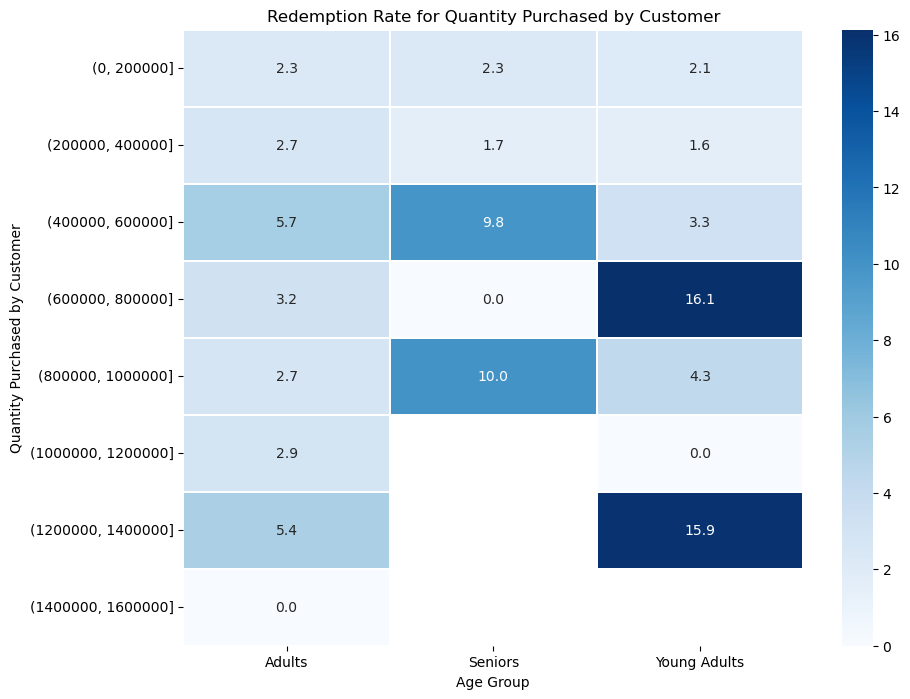

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
d = pd.crosstab(food_middle['qa_bins'], food_middle['age_group'], food_middle['redemption_status'], aggfunc='mean')*100
sns.heatmap(d, annot=True, ax=ax, linewidths=.1, fmt='.1f', cmap="Blues")
plt.title("Redemption Rate for Quantity Purchased by Customer")
plt.ylabel("Quantity Purchased by Customer")
plt.xlabel("Age Group")

In [33]:
food_middle['quantity_purchased'].max()

207579.0

In [34]:
pd.cut(food_middle['quantity_purchased'], bins=np.arange(0, 500000, 100000))

0             (0, 100000]
7             (0, 100000]
10            (0, 100000]
12            (0, 100000]
19       (100000, 200000]
               ...       
78309         (0, 100000]
78327         (0, 100000]
78328         (0, 100000]
78334         (0, 100000]
78360         (0, 100000]
Name: quantity_purchased, Length: 12413, dtype: category
Categories (4, interval[int64, right]): [(0, 100000] < (100000, 200000] < (200000, 300000] < (300000, 400000]]

In [35]:
food_middle['qu_bins'] = pd.cut(food_middle['quantity_purchased'], bins=np.arange(0, 500000, 100000))

Text(0.5, 58.7222222222222, 'Age Group')

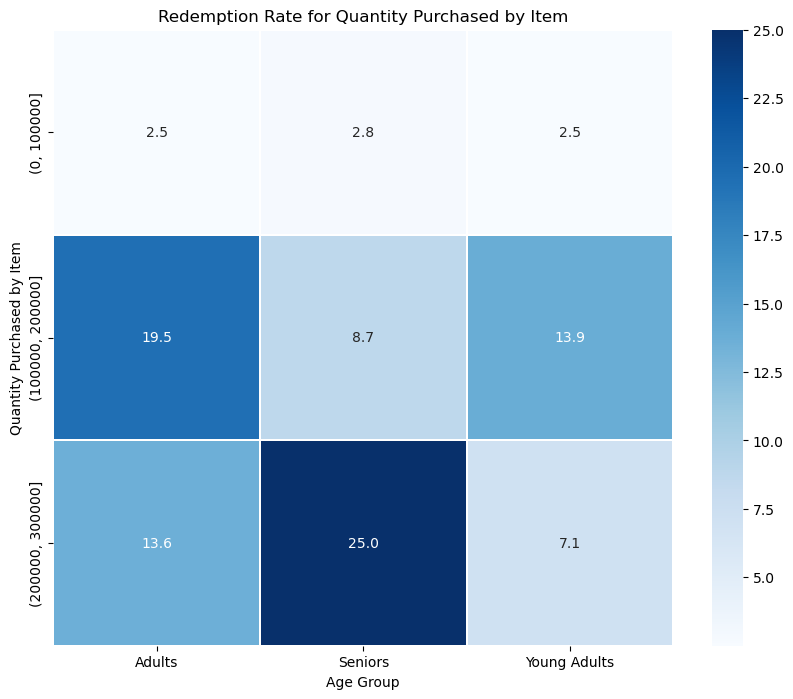

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
d = pd.crosstab(food_middle['qu_bins'], food_middle['age_group'], food_middle['redemption_status'], aggfunc='mean')*100
sns.heatmap(d, annot=True, ax=ax, linewidths=.1, fmt='.1f', cmap="Blues")
plt.title("Redemption Rate for Quantity Purchased by Item")
plt.ylabel("Quantity Purchased by Item")
plt.xlabel("Age Group")

In [37]:
#Filter Established Brands for Natural Products
natural_products = established[established.product_group == 'Natural']

Text(0, 0.5, 'Redemption Rate')

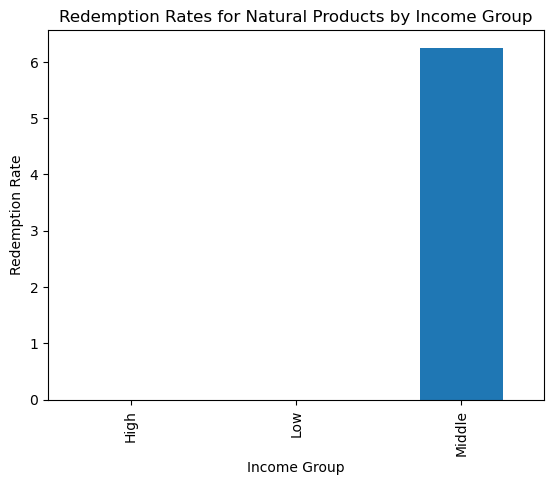

In [38]:
#Redemption Rates for Natural Products and Income Group
natural_products_income = round(natural_products.groupby('income_group')['redemption_status'].mean()*100, 2)
natural_products_income.plot(kind="bar", title="Redemption Rates for Natural Products by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Redemption Rate")

In [39]:
#Filter Natural Products for Middle Income
natural_middle = natural_products[natural_products.income_group == 'Middle']

Text(0.5, 58.7222222222222, 'Age Group')

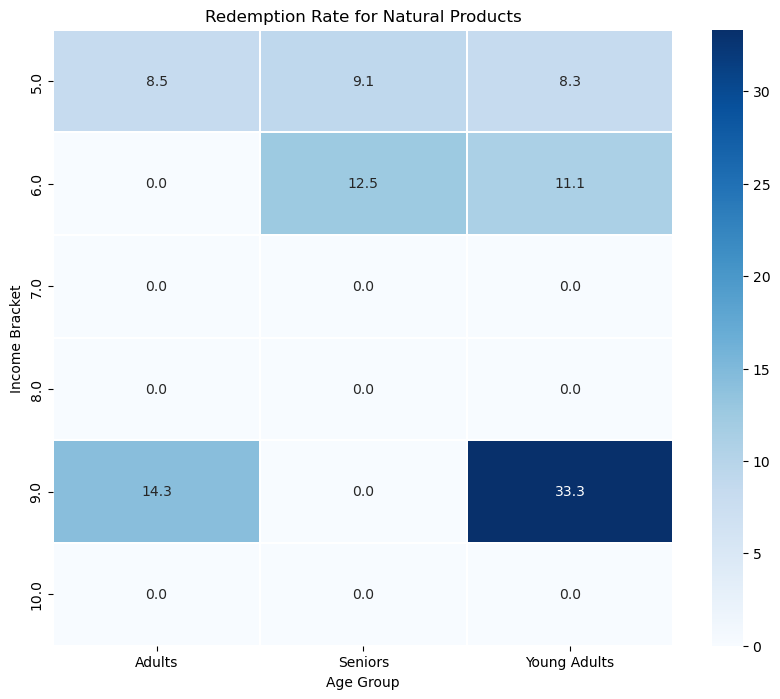

In [40]:
#Heat Map for Natural Products by Age Group and Income Bracket
fig, ax = plt.subplots(figsize=(10, 8))
c = pd.crosstab(natural_middle['income_bracket'], natural_middle['age_group'], natural_middle['redemption_status'], aggfunc='mean')*100
sns.heatmap(c, annot=True, ax=ax, linewidths=.1, fmt='.1f', cmap="Blues")
plt.title("Redemption Rate for Natural Products")
plt.ylabel("Income Bracket")
plt.xlabel("Age Group")

### Insights

- Customers do not use coupons for Local Brands

- Customers do not use coupons for Pharmaceutical or Speciality Products

- Food Products
    - High Income customers do not redeem coupons for food products
    - Low income customers with a larger family size redeem more coupons
    - For Middle Income Customers
        - Meat is the most popular category for adults
        - Prepared Food is the most popular category for middle income seniors and young adults
        -f       
        
- Natural Products
    - Only Middle Income customers redeem coupons for natural products
    - Certain income brackets within Middle Income redeem coupons for natural products at a very high rate

### Recommendations

- Stop sending coupons for Local Brands, Pharmaceutical and Speciality Products
- Stop sending coupons to High Income Customers
- Send more food products coupons to Low and Middle Income Customers with a large family size
- Send more coupons to Middle Income Customers for Meat, Prepared Food and Natural Products
- Send more coupons to customers that purchase more items (loyalty rewards)

### Timeframe for Dataset

In [41]:
#Find timeframe for transation data using customer_transaction_data.csv from original 
timeframe = pd.read_csv("customer_transaction_data.csv")

In [42]:
timeframe.reset_index()

,index,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...,...
1324561,1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [43]:
timeframe.index.names = ['transaction_id']

In [44]:
timeframe.reset_index(inplace=True)

In [45]:
timeframe.head()

,transaction_id,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [46]:
timeframe['date'] = pd.to_datetime(timeframe['date'])

In [47]:
transactions_by_month = timeframe.groupby(timeframe['date'].dt.to_period('M')).sum()

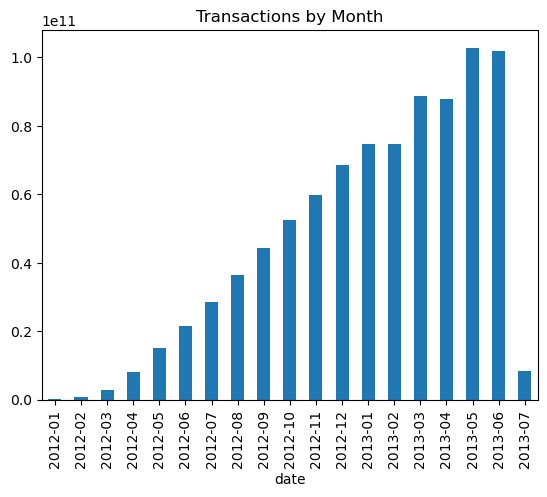

In [48]:
transactions_by_month.plot(y='transaction_id', kind='bar', title='Transactions by Month', legend=False)
plt.show()

In [49]:
first = timeframe['date'].min()
print(first)

2012-01-02 00:00:00


In [50]:
last = timeframe['date'].max()
print(last)

2013-07-03 00:00:00


In [51]:
months = last.to_period('M') - first.to_period('M')
print(months)

<18 * MonthEnds>
